## 感知机
感知机是根据输入实例的特征向量 x 对其进行二类分类的线性模型：
$$ f(x)=sign(w\cdot x+b) $$
感知机模型对应于输入空间（特征空间）中的分离超平面 $ w\cdot x+b=0 $.其中w是超平面的法向量，b是超平面的截距。

可见感知机是一种线性分类模型，属于判别模型。
***
## 感知机学习的假设
感知机学习的重要前提假设是训练数据集是线性可分的。
***
## 感知机学习策略
感知机学的策略是极小化损失函数。

损失函数的一个自然选择是误分类点的总数。但是，这样的损失函数不是参数 w, b的连续可导的函数，不易于优化。所以通常是选择误分类点到超平面 S 的总距离：
$$ L(w,b)=-\sum_{x_i\in M}y_i(w\cdot x_i+b) $$
学习的策略就是求得使 L(w,b) 为最小值的 w 和 b。其中 M 是误分类点的集合。
***
## 感知机学习的算法
感知机学习算法是基于随机梯度下降法的对损失函数的最优化算法，有原始形式和对偶形式，算法简单易于实现。
### 原始形式
$$ \min_{w,b}L(w,b)=-\sum_{x_i\in M}y_i(w\cdot x_i+b) $$
首先，任意选取一个超平面$ w_0, b_0 $,然后用梯度下降法不断地极小化目标函数。极小化的过程中不是一次使 M 中所有误分类点得梯度下降，而是一次随机选取一个误分类点，使其梯度下降。
$$ \nabla_wL(w,b)=-\sum_{x_i\in M}y_ix_i $$
$$ \nabla_bL(w,b)=-\sum_{x_i\in M}y_i $$

随机选取一个误分类点$ (x_i,y_i) $，对 w,b 进行更新：
$$ w\leftarrow w+\eta y_ix_i $$
$$ b\leftarrow b+\eta y_i $$
其中$ \eta(0<\eta\leq1) $是学习率。

### 对偶形式
对偶形式的基本想法是，将 w 和 b 表示为是咧 $ x_i 和标记 y_i $的线性组合的形式，通过求解其系数而得到 w 和 b。
$$ w\leftarrow w+\eta y_ix_i $$
$$ b\leftarrow b+\eta y_i $$
逐步修改 w,b，设修改 n 次，则 w,b 关于$ (x_i,y_i) $ 的增量分别是 $ \alpha_iy_ix_i 和 \alpha_iy_i $, 这里 $ \alpha_i=n_i\eta $。最后学习到的 w,b 可以分别表示为：
$$ w=\sum_{i=1}^{N}\alpha_iy_ix_i $$
$$ b=\sum_{i=1}^{N}\alpha_iy_i $$
这里， $ \alpha_i\geq0, i=1,2,...,N $,当 $ \eta=1 $时，表示第i个是实例点由于误分类而进行更新的次数，实例点更新次数越多，说明它距离分离超平面越近，也就越难区分，该点对学习结果的影响最大。

感知机模型对偶形式： $$f(x)=sign(\sum_{j=1}^{N}\alpha_jy_jx_j\cdot x+b)，  其中\alpha=(\alpha_1,\alpha_2,...,\alpha_N)^T$$
学习时初始化 $ \alpha \leftarrow 0, b \leftarrow 0 $, 在训练集中找分类错误的点，即：
 $$ y_i(\sum_{j=1}^{N}\alpha_jy_jx_j\cdot x_i+b)\leq 0 $$
 然后更新：
 $$ \alpha_i \leftarrow \alpha_i+\eta$$
$$ b\leftarrow b+\eta y_i $$
知道训练集中所有点正确分类

对偶形式中训练实例仅以内积的形式出现，为了方便，可以预先将训练集中实例间的内积计算出来以矩阵的形式存储，即 Gram 矩阵。
***
## 总结

* 当训练数据集线性可分的时候，感知机学习算法是收敛的，感知机算法在训练数据集上的误分类次数 k 满足不等式:
$$ k\leq (\frac{R}{\gamma})^2  $$
具体证明可见 <font color=blue>李航《统计学习方法》或 林轩田《机器学习基石》</font>。
* 当训练当训练数据集线性可分的时候，感知机学习算法存在无穷多哥街，其解由于不同的初值或不同的迭代顺序而可能不同，即存在多个分离超平面能把数据集分开。
* 感知机学习算法简单易求解，但一般的感知机算法不能解决异或等线性不可分的问题。

***
## 导入相关包并创建数据集
为了快速方便的创建数据集，此处采用 scikit-learn 里的 [make_blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

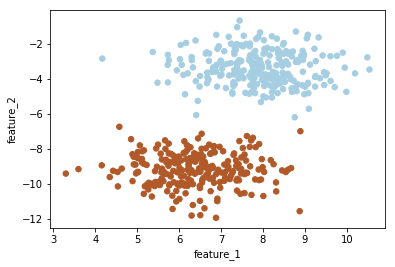

In [2]:
# 创建一个数据集，X有两个特征，y={-1，1}
X, y = make_blobs(n_samples=500, centers=2, random_state=6)
y[y==0] = -1
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()

***
## 感知机（采用原始形式）
创建感知机模型的原始形式的类，并在训练集上训练，测试集上简单测试。

In [3]:
class PerceptronRaw():
    def __init__(self):
        self.W = None;
        self.bias = None;
        
    def fit(self, x_train, y_train, learning_rate=0.05, n_iters=100, plot_train=True):
        print("开始训练...")
        num_samples, num_features = x_train.shape
        self.W = np.random.randn(num_features)
        self.bias = 0
        
        while True:
            erros_examples = []
            erros_examples_y = [] 
            # 查找错误分类的样本点
            for idx in range(num_samples):
                example = x_train[idx]
                y_idx = y_train[idx]
                # 计算距离
                distance = y_idx * (np.dot(example, self.W) + self.bias)
                if distance <= 0:
                    erros_examples.append(example)
                    erros_examples_y.append(y_idx)
            if len(erros_examples) == 0:
                break;
            else:
                # 随机选择一个错误分类点，修正参数
                random_idx = np.random.randint(0, len(erros_examples))
                choosed_example = erros_examples[random_idx]
                choosed_example_y = erros_examples_y[random_idx]
                self.W = self.W + learning_rate * choosed_example_y * choosed_example
                self.bias = self.bias + learning_rate * choosed_example_y    
        print("训练结束")
        
        # 绘制训练结果部分
        if plot_train is True:
            x_hyperplane = np.linspace(2, 10, 8)
            slope = -self.W[0]/self.W[1]
            intercept = -self.bias/self.W[1]
            y_hpyerplane = slope * x_hyperplane + intercept
            
            plt.xlabel("feature_1")
            plt.ylabel("feature_2")
            plt.xlim((2, 10))
            plt.ylim((-12, 0))
            plt.title("Dataset and Decision in Training")
            plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
            plt.plot(x_hyperplane, y_hpyerplane, color='g', label='Decision')
            plt.legend(loc='upper left')
            plt.show()
        
    def predict(self, x):
        if self.W is None or self.bias is None:
            raise NameError("模型未训练")
        y_predict = np.sign(np.dot(x, self.W) + self.bias)
        return y_predict

In [4]:
X_train = X[0:450]
y_train = y[0:450]
X_test = X[450:500]
y_test = y[450:500]

开始训练...
训练结束


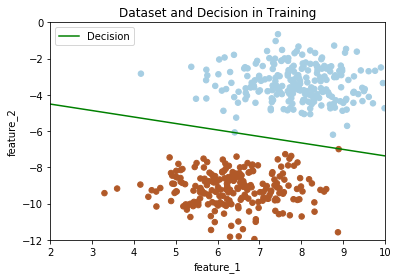

In [5]:
# 实例化模型，并训练
model_raw = PerceptronRaw()

model_raw.fit(X_train, y_train)

In [6]:
# 测试，因为测试集和训练集来自同一分布的线性可分数据集，所以这里测试准确率达到了 1.0
y_predict = model_raw.predict(X_test)

accuracy = np.sum(y_predict == y_test) / y_predict.shape[0]
print("在测试集上的准确率: {0}".format(accuracy))

在测试集上的准确率: 1.0
